# [Solution] Lab4 - Training Deep Neural Network
- Author: Thanat Lapthawan

## Lab Instruction 

In this lab, you will learn to train a deep fully-connect neural network using Keras library with Tensorflow backend. We will use MNIST data which is a Keras build-in dataset. 

See http://yann.lecun.com/exdb/mnist

**Note:**
Before doing any machine learning/deep learning project, you have to think about the following thing:
1. What is your problem and your data?
<br> - What type of problem do you want to solve? What is your data? What are you trying to predict? Does your data have enough information for your model to predict the expected output?

2. How do you measure your success?
<br> - What do you mean by good model performance? How do you know that your model is ready to be deploy?
<br> - Accuracy? Precision and recall? profit gain? ROC AUC?

3. What is your evaluation method?
<br> - Hold-out method? CV? Iterate CV?

4. How to preprocess your data before fed into a model?

5. What is your baseline? What is a model structure? how does your last layer look like? What is your loss function? What is your optimization function? 

6. Develop a overfit model to figure out how big a model you need by
<br> - 6.1 Add more layer
<br> - 6.2 Make layer bigger
<br> - 6.3 Train more epochs

7. Tune your model to balance the model performance between underfit and overfit (optimization vs generalization)

First, import all important library to this project.

In [1]:
import keras
from keras import optimizers
from keras import models
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### 1. Load MNIST data

In [4]:
from keras.datasets import mnist

### Load data ###
(X_train ,y_train), (X_test ,y_test) = mnist.load_data()
#################

Learn more about the data. For example:
- The distribution of a target class. 
- The characteristic of the input data. How does it looklike? 
- etc.

In [ ]:
# Skip this because we already done that in lab 3

### 2. Preprocess a data

In [5]:
# Flatten and normalize
def preprocess(data):
    data = data.reshape(data.shape[0],data.shape[1]*data.shape[2]).astype('float32')/255.
    return data

X_train = preprocess(X_train)
X_test = preprocess(X_test)

### 3. Build a model 
Using `Sequential()`, build a five-fully connect layer with 128 neuron each, *elu* as an activation function, and *he_initialier* as a weight initialier function. 
The output is a probability of each target class. We will use *Adam optimizer* with the *cross-entropy loss function*.

In [11]:
dnn = models.Sequential()
# First layer with input shape of 28*28
dnn.add(layers.Dense(128,activation='elu',
                     input_shape=(X_train.shape[1],),
                     kernel_initializer='he_normal',
                     name='hidden_1'))
# Second layer
dnn.add(layers.Dense(128,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_2'))

# Third layer
dnn.add(layers.Dense(128,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_3'))

# Fourth layer
dnn.add(layers.Dense(128,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_4'))

# Last layer
dnn.add(layers.Dense(10,activation='softmax',name='output'))


# compile
dnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['acc']
           )

# save a model
dnn.save('Experiment_model/baseline_model.h5')


In [24]:
dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 128)               100480    
_________________________________________________________________
hidden_2 (Dense)             (None, 128)               16512     
_________________________________________________________________
hidden_3 (Dense)             (None, 128)               16512     
_________________________________________________________________
hidden_4 (Dense)             (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


### 4. Train the model

We will train a total of 10 epoch and a batch size of 128. 

To prevent an information leak to test set, which casue an overfit, we will split the data to train set, test set, and validation set. Doing so, we will split the training data into 90% train set and 10% validation set.

Since keras `validation_split` argument split the last 10% of data to be validation set, the target class may not be equally distributed in validation set. Thus, we have to use `train_test_split`  from sklearn to split the data into train set and validation set. 

Hint: Use parameter `stratify = y` in `train_test_split()`
See http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [12]:
from sklearn.model_selection import train_test_split

### Split data ###
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,stratify = y_train, random_state=0)
##################

Text(0.5,1,'Validation class distribution')

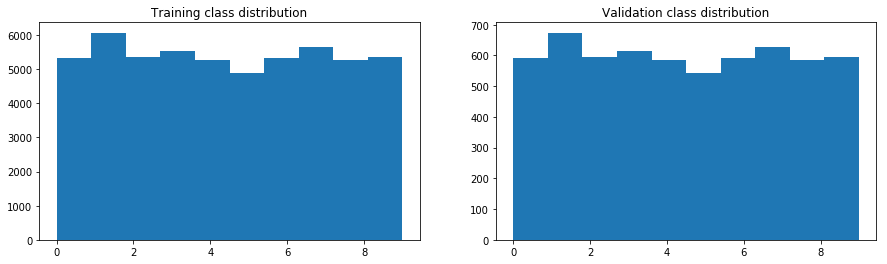

In [22]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
ax[0].hist(y_train)
ax[0].set_title('Training class distribution')
ax[1].hist(y_val)
ax[1].set_title('Validation class distribution')


In [23]:
# Define variable to store  history of all model training
save_history = []

In [25]:
### Fit the model ###
history = dnn.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=(X_val,y_val))
#####################

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 57us/step - loss: 0.2604 - acc: 0.9197 - val_loss: 0.1457 - val_acc: 0.9562
Epoch 2/10
54000/54000 [==============================] - 2s 45us/step - loss: 0.1147 - acc: 0.9647 - val_loss: 0.1421 - val_acc: 0.9567
Epoch 3/10
54000/54000 [==============================] - 3s 54us/step - loss: 0.0804 - acc: 0.9739 - val_loss: 0.1164 - val_acc: 0.9658
Epoch 4/10
54000/54000 [==============================] - 3s 54us/step - loss: 0.0642 - acc: 0.9792 - val_loss: 0.1053 - val_acc: 0.9678
Epoch 5/10
54000/54000 [==============================] - 3s 54us/step - loss: 0.0519 - acc: 0.9830 - val_loss: 0.0946 - val_acc: 0.9743
Epoch 6/10
54000/54000 [==============================] - 3s 49us/step - loss: 0.0406 - acc: 0.9866 - val_loss: 0.1114 - val_acc: 0.9682
Epoch 7/10
54000/54000 [==============================] - 3s 48us/step - loss: 0.0411 - acc: 0.9861 - val_loss: 0.0986 - val_acc:

### 5. Evalute the model

Think of the metric that you want to evaluate/measure the performance of your model that can answer the following questions:
- The model is overfit or underfit.
- At which epoch/iteration that it converge or the model become overfit.
- How does the model perform on each data class. What is an overall performace of your model?

In [26]:
# define a function to plot the result from training step

def show_result(history): 
    
    # Print the result from the last epoch
    print('Last train accuracy: %s'%history.history['acc'][-1])
    print('Last validation accuracy: %s'%history.history['val_acc'][-1])
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    epochs = range(1, len(loss) + 1)   
    
    # Define a subplot 
    fig, axs = plt.subplots(1,2,figsize=(15,4))
    
    # Plot loss
    loss_plot = axs[0]
    
    loss_plot.plot(epochs, loss, 'c--', label='Training loss')
    loss_plot.plot(epochs, val_loss, 'b', label='Validation loss')
    loss_plot.set_title('Training and validation loss')
    loss_plot.set_xlabel('Epochs')
    loss_plot.set_ylabel('Loss')
    loss_plot.legend()
    
    # Plot accuracy
    acc_plot = axs[1]
    
    acc_plot.plot(epochs, acc, 'c--', label='Training acc')
    acc_plot.plot(epochs, val_acc, 'b', label='Validation acc')
    acc_plot.set_title('Training and validation accuracy')
    acc_plot.set_xlabel('Epochs')
    acc_plot.set_ylabel('Accuracy')
    acc_plot.legend()

Last train accuracy: 0.991
Last validation accuracy: 0.973


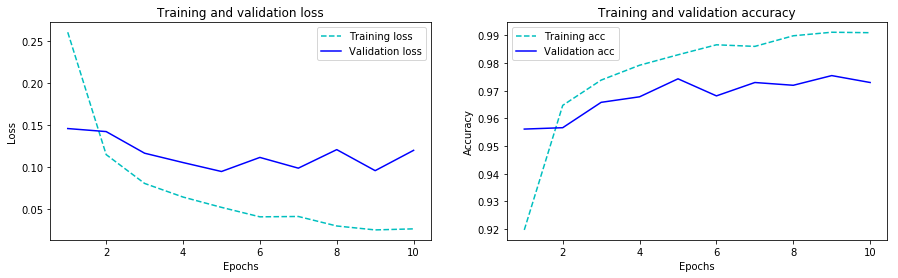

In [27]:
### Evaluate the model ###
show_result(history)
##########################

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

# Define an evaluation function to print the evaluation result
def evaluation_report(model,features,labels):
    
    # Calculate result
    result = model.evaluate(features,labels,verbose=False)
    
    # Predict and convert into a class
    pred_class = model.predict(features).argmax(axis=1)
    
    # Show report
    print(confusion_matrix(labels,pred_class))
    print(classification_report(labels,pred_class))
    print("Loss: %s Accuracy: %s" %(result[0],result[1]))


In [35]:
evaluation_report(dnn,X_test,y_test)

[[ 961    0    2    4    0    2    5    2    1    3]
 [   0 1128    0    1    0    1    1    1    3    0]
 [   3    4  992    5    3    0    2   18    5    0]
 [   0    0    4  983    0    1    0   11    5    6]
 [   0    2    9    0  953    1    3    7    0    7]
 [   2    0    0   21    1  858    3    2    4    1]
 [   1    2    2    1    2    9  939    0    2    0]
 [   0    9    5    0    0    0    0 1008    0    6]
 [   4    1    2    6    5    5    1    6  938    6]
 [   2    2    2    8   16    1    0   13    1  964]]
             precision    recall  f1-score   support

          0       0.99      0.98      0.98       980
          1       0.98      0.99      0.99      1135
          2       0.97      0.96      0.97      1032
          3       0.96      0.97      0.96      1010
          4       0.97      0.97      0.97       982
          5       0.98      0.96      0.97       892
          6       0.98      0.98      0.98       958
          7       0.94      0.98      0.96  

From the report show above, the result is really high (97% accuracy on test set) with each class are being predict correctly. There are some class that the model are being miss classify which are predict 3 but is actually 5, 7 but is actually 2, 4 but is actually 9, and 7 but is actually 9. The precision metric shown that our model perform worst on dat class 3. 

We will set 97% accuracy as a baseline which we will tune our model to get higher accuracy.

### 6. Tune the model 

Try to tune your model by: 
1. Try Increasing epoch and see how it affect your model? Does the result better or it get overfit?
2. Apply an early stop. What is the result do you get? (See https://chrisalbon.com/deep_learning/keras/neural_network_early_stopping/)
4. Try adding regularizer l1 or l2 (or simutaneus l1, l2) to your model. How does it affect your model?
5. Try to add dropout (any dropout rate) with every layer. How does it affect your model? Does it help reduce overfit?

*Discuss the result from these step in the discssion section*

After try above step, **try to achive the highest precision** by tuning the model using what you had aleady learn in the class.
You can try to change the structure of the model by increase or decrease the layer and neuron node in each layer. (Use only fully-connect layer, don't use other type of layer yet!)

You can also try to do a data augmentation.

**The current highest precision of MNIST model is around 99.8%** ( Just try as must as possible, don't worry if you don't achieve this number of precision.)

**Write  down what are you doing and why in each tuning step**

In [40]:
# Load baseline model
dnn = models.load_model('Experiment_model/baseline_model.h5')

/home/thanatlapthawan/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [41]:
dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 128)               100480    
_________________________________________________________________
hidden_2 (Dense)             (None, 128)               16512     
_________________________________________________________________
hidden_3 (Dense)             (None, 128)               16512     
_________________________________________________________________
hidden_4 (Dense)             (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


In [42]:
# compile baseline model
dnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['acc'])

In [43]:
dnn.save('Experiment_model/tune_model.h5')

#### Increase epoch

Last train accuracy: 0.9969444444444444
Last validation accuracy: 0.9784999995231628


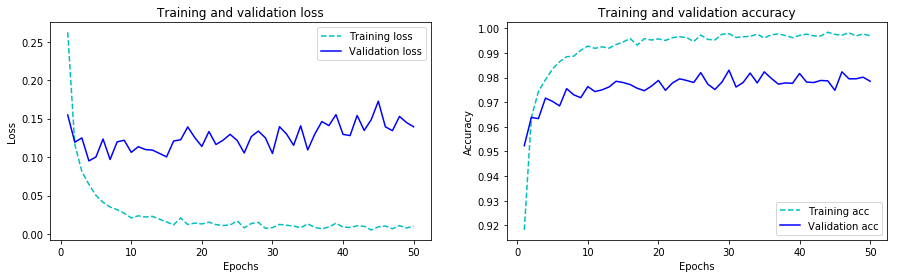

In [39]:
# Fit model with 50 epoch
history = dnn.fit(X_train,y_train,batch_size=128,epochs=50,validation_data=(X_val,y_val),verbose=False)
save_history.append(history)
show_result(history)

Model overfit quickly at the epoch 2 and convert around 17 - 20 epcoh as the loss start to stablize.

#### Early stop

In [48]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# Load baseline model
dnn = models.load_model('Experiment_model/tune_model.h5')

# Fit model with early stop
history=dnn.fit(X_train,y_train,batch_size=128,epochs=30,callbacks=[early_stopping],validation_data=(X_val,y_val))

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 3s 55us/step - loss: 0.2644 - acc: 0.9187 - val_loss: 0.1406 - val_acc: 0.9580
Epoch 2/30
54000/54000 [==============================] - 2s 45us/step - loss: 0.1178 - acc: 0.9640 - val_loss: 0.1355 - val_acc: 0.9593
Epoch 3/30
54000/54000 [==============================] - 2s 45us/step - loss: 0.0838 - acc: 0.9732 - val_loss: 0.1094 - val_acc: 0.9667
Epoch 4/30
54000/54000 [==============================] - 2s 45us/step - loss: 0.0637 - acc: 0.9797 - val_loss: 0.1094 - val_acc: 0.9695
Epoch 5/30
54000/54000 [==============================] - 2s 45us/step - loss: 0.0517 - acc: 0.9829 - val_loss: 0.0997 - val_acc: 0.9707
Epoch 6/30
54000/54000 [==============================] - 2s 45us/step - loss: 0.0414 - acc: 0.9864 - val_loss: 0.1080 - val_acc: 0.9713
Epoch 7/30
54000/54000 [==============================] - 2s 44us/step - loss: 0.0334 - acc: 0.9888 - val_loss: 0.0945 - val_acc:

Last train accuracy: 0.9795740741093953
Last validation accuracy: 0.9711666668256124


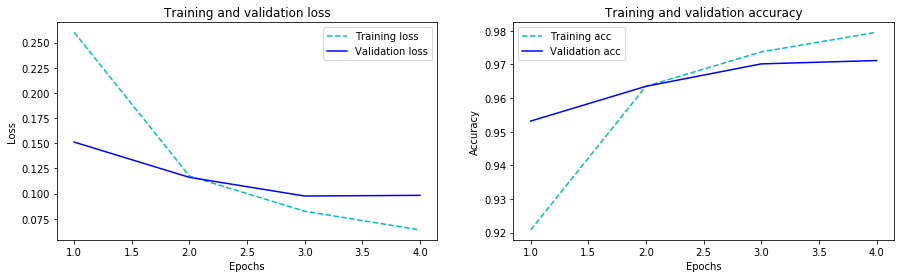

In [47]:
show_result(history)

Applied early stop can help us find a ideal value where the validation loss is not decreased furthur. (Prevent overfitting) From a graph, after 2 epoch (patient argument = 2) when the loss are not going to be lower, the training is interupt and stop. Thus, the model will not affect overfit much. However, the model still overfit because the training loss is much lower than validation loss.

#### Adding L1 Regularizer 

In [62]:
from keras import regularizers

def dnn_with_regularizer(reg = None, model_file_name = 'reg_model.h5'):
    dnn = models.Sequential()
    # First layer with input shape of 28*28
    dnn.add(layers.Dense(128,activation='elu',
                         input_shape=(X_train.shape[1],),
                         kernel_initializer='he_normal',
                         activity_regularizer=reg,
                         name='hidden_1'))
    # Second layer
    dnn.add(layers.Dense(128,activation='elu',
                         kernel_initializer='he_normal',
                         activity_regularizer=reg,
                         name='hidden_2'))

    # Third layer
    dnn.add(layers.Dense(128,activation='elu',
                         kernel_initializer='he_normal',
                         activity_regularizer=reg,
                         name='hidden_3'))

    # Fourth layer
    dnn.add(layers.Dense(128,activation='elu',
                         kernel_initializer='he_normal',
                         activity_regularizer=reg,
                         name='hidden_4'))
    # Last layer
    dnn.add(layers.Dense(10,activation='softmax',name='output'))
    # save a model
    dnn.save('Experiment_model/%s'%model_file_name)
    # compile
    dnn.compile(optimizer='adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['acc'])
    dnn.summary()
    return dnn

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 128)               100480    
_________________________________________________________________
hidden_2 (Dense)             (None, 128)               16512     
_________________________________________________________________
hidden_3 (Dense)             (None, 128)               16512     
_________________________________________________________________
hidden_4 (Dense)             (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________
Last train accuracy: 0.9685000000353212
Last validation accuracy: 0.9373333336512247


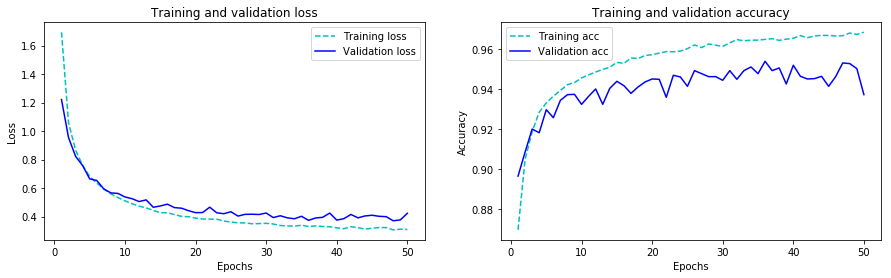

In [68]:
# add l1 regularizer with alpha = 0.0001

dnn = dnn_with_regularizer(reg = regularizers.l1(0.0001), model_file_name = 'l1_reg_model.h5')
history = dnn.fit(X_train,y_train,batch_size=128,epochs=50,validation_data=(X_val,y_val),verbose=False)
show_result(history)

Adding L1 regularization make the overall model performance worst. The model still overfit and the model took longer epoch to converge comparing to the model without regularizer.

#### Adding L2 Regularizer 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 128)               100480    
_________________________________________________________________
hidden_2 (Dense)             (None, 128)               16512     
_________________________________________________________________
hidden_3 (Dense)             (None, 128)               16512     
_________________________________________________________________
hidden_4 (Dense)             (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________
Last train accuracy: 0.8946666666666667
Last validation accuracy: 0.888


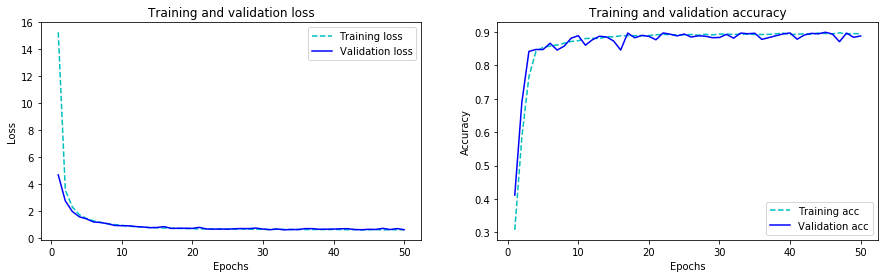

In [74]:
# add l2 regularizer with alpha = 0.01

dnn = dnn_with_regularizer(reg = regularizers.l2(0.01), model_file_name = 'l2_reg_model_1.h5')
history = dnn.fit(X_train,y_train,batch_size=128,epochs=50,validation_data=(X_val,y_val),verbose=False)
show_result(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 128)               100480    
_________________________________________________________________
hidden_2 (Dense)             (None, 128)               16512     
_________________________________________________________________
hidden_3 (Dense)             (None, 128)               16512     
_________________________________________________________________
hidden_4 (Dense)             (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________
Last train accuracy: 0.9325
Last validation accuracy: 0.9225


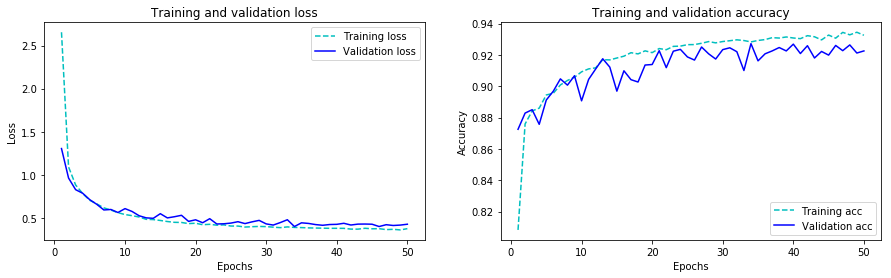

In [69]:
# add l2 regularizer with alpha = 0.001

dnn = dnn_with_regularizer(reg = regularizers.l2(0.001), model_file_name = 'l2_reg_model_2.h5')
history = dnn.fit(X_train,y_train,batch_size=128,epochs=50,validation_data=(X_val,y_val),verbose=False)
show_result(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 128)               100480    
_________________________________________________________________
hidden_2 (Dense)             (None, 128)               16512     
_________________________________________________________________
hidden_3 (Dense)             (None, 128)               16512     
_________________________________________________________________
hidden_4 (Dense)             (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________
Last train accuracy: 0.976870370388031
Last validation accuracy: 0.9503333328564961


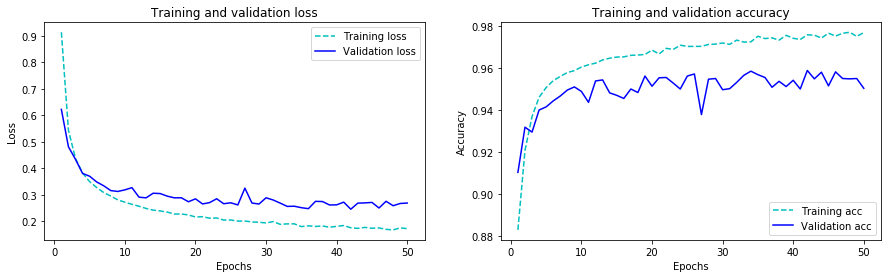

In [70]:
# add l2 regularizer with alpha = 0.0001

dnn = dnn_with_regularizer(reg = regularizers.l2(0.0001), model_file_name = 'l2_reg_model_3.h5')
history = dnn.fit(X_train,y_train,batch_size=128,epochs=50,validation_data=(X_val,y_val),verbose=False)
show_result(history)

While L2 regularization with alpha = 0.001 help reduce overfit a lot, the model perform worst than the model that not having regularization method. However, with alpha = 0.01, the model is not overfit but the model bias is increased which make the performance in term of accuracy worst. With effect of alpha = 0.0001, the model is overfit around epoch 3 which is the same as the model without regularization method.  

#### Adding both L1 L2 Regularizer 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 128)               100480    
_________________________________________________________________
hidden_2 (Dense)             (None, 128)               16512     
_________________________________________________________________
hidden_3 (Dense)             (None, 128)               16512     
_________________________________________________________________
hidden_4 (Dense)             (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________
Last train accuracy: 0.9173888889418708
Last validation accuracy: 0.9116666661898295


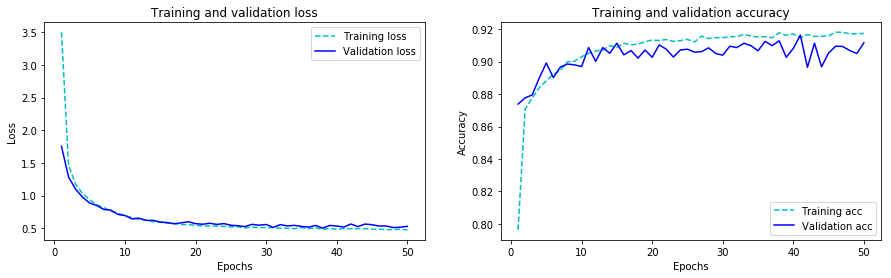

In [71]:
# add l2 regularizer with alpha = 0.001

dnn = dnn_with_regularizer(reg = regularizers.l1_l2(l1=0.0001, l2=0.001), model_file_name = 'l1_l2_reg_model.h5')
history = dnn.fit(X_train,y_train,batch_size=128,epochs=50,validation_data=(X_val,y_val),verbose=False)
show_result(history)

With both L1 and L2, the model is not overfit but the bias is larger than the model without regularization. As you can see that the model converge around epoch 20, both loss and accuracy become stable.

#### Adding Dropout

In [133]:
dnn = models.Sequential()
# First layer with input shape of 28*28
dnn.add(layers.Dense(128,activation='elu',
                     input_shape=(X_train.shape[1],),
                     kernel_initializer='he_normal',
                     name='hidden_1'))
dnn.add(layers.Dropout(0.1,name='dropout_1'))
# Second layer
dnn.add(layers.Dense(128,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_2'))
dnn.add(layers.Dropout(0.1,name='dropout_2'))
# Third layer
dnn.add(layers.Dense(128,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_3'))
dnn.add(layers.Dropout(0.2,name='dropout_3'))
# Fourth layer
dnn.add(layers.Dense(128,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_4'))
dnn.add(layers.Dropout(0.2,name='dropout_4'))
# Last layer
dnn.add(layers.Dense(10,activation='softmax',name='output'))
# save a model
dnn.save('dnn_with_dropout.h5')
# compile
dnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['acc'])
dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
_________________________________________________________________
hidden_2 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)               0         
_________________________________________________________________
hidden_3 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
hidden_4 (Dense)             (None, 128)               16512     
__________

Last train accuracy: 0.9941111111111111
Last validation accuracy: 0.9816666666666667


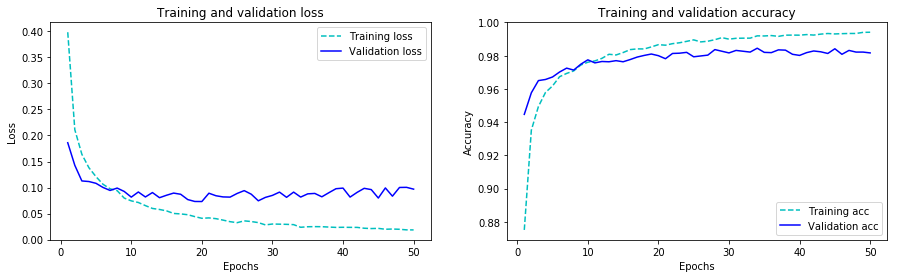

In [134]:
history = dnn.fit(X_train,y_train,batch_size=128,epochs=50,validation_data=(X_val,y_val),verbose=False)
show_result(history)

Adding dropout help make the model less overfit while the converge time is faster comparing to adding regularizer. From the result, the model start to overfit around epoch 8 - 10. However, the converge time is slower compare with the model without regularization method.

#### Tuning: experiment 1 

From the effect that we study from both current lab and previous lab, we will start with 5-layer neural net with dropout.

In [78]:
# 5-layer neural network with dropout rate 0.1

dnn = models.Sequential()
# First layer with input shape of 28*28
dnn.add(layers.Dense(128,activation='elu',
                     input_shape=(X_train.shape[1],),
                     kernel_initializer='he_normal',
                     name='hidden_1'))
dnn.add(layers.Dropout(0.1,name='dropout_1'))
# Second layer
dnn.add(layers.Dense(128,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_2'))
dnn.add(layers.Dropout(0.1,name='dropout_2'))
# Third layer
dnn.add(layers.Dense(128,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_3'))
dnn.add(layers.Dropout(0.1,name='dropout_3'))
# Fourth layer
dnn.add(layers.Dense(128,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_4'))
dnn.add(layers.Dropout(0.1,name='dropout_4'))
# Last layer
dnn.add(layers.Dense(10,activation='softmax',name='output'))

# compile
dnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['acc'])
dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
hidden_2 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
hidden_3 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
hidden_4 (Dense)             (None, 128)               16512     
__________

In [79]:
# applied an early stop
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = dnn.fit(X_train,y_train,
                  batch_size=64,
                  epochs=50,
                  validation_data=(X_val,y_val),
                  callbacks=[early_stopping],
                  verbose=False)
# save a model
dnn.save('Experiment_model/dnn_model_1.h5')

Last train accuracy: 0.9961666666666666
Last validation accuracy: 0.9785


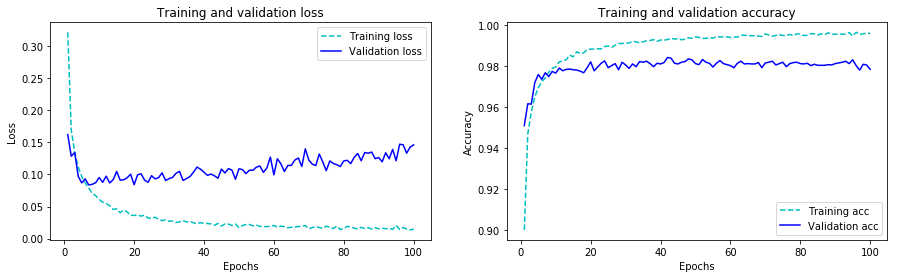

In [80]:
show_result(history)

#### Tuning: experiment 2

In [81]:
# 5-layer neural network with dropout rate 0.2 to the last 2 layer

dnn = models.Sequential()
# First layer with input shape of 28*28
dnn.add(layers.Dense(128,activation='elu',
                     input_shape=(X_train.shape[1],),
                     kernel_initializer='he_normal',
                     name='hidden_1'))
# Second layer
dnn.add(layers.Dense(128,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_2'))
# Third layer
dnn.add(layers.Dense(128,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_3'))
dnn.add(layers.Dropout(0.2,name='dropout_1'))
# Fourth layer
dnn.add(layers.Dense(128,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_4'))
dnn.add(layers.Dropout(0.2,name='dropout_2'))
# Last layer
dnn.add(layers.Dense(10,activation='softmax',name='output'))

# compile
dnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['acc'])
dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 128)               100480    
_________________________________________________________________
hidden_2 (Dense)             (None, 128)               16512     
_________________________________________________________________
hidden_3 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
hidden_4 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total para

Last train accuracy: 0.9908333333333333
Last validation accuracy: 0.9771666668256124


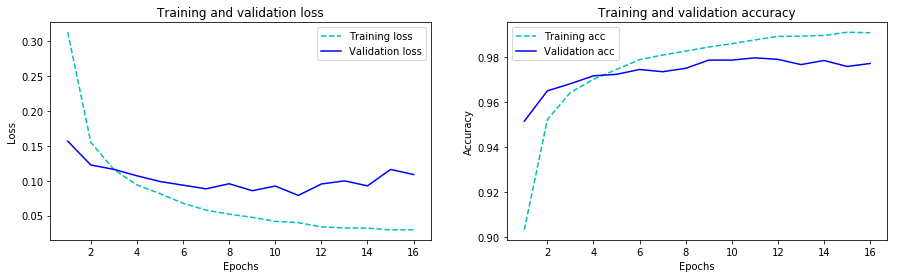

In [82]:
# applied early stop define in above step with patience = 5

history = dnn.fit(X_train,y_train,
                  batch_size=64,
                  epochs=50,
                  validation_data=(X_val,y_val),
                  callbacks=[early_stopping],
                  verbose=False)

# save a model
dnn.save('Experiment_model/dnn_model_2.h5')

show_result(history)

#### Tuning: experiment 3

In [83]:
# 4-layer neural network with dropout rate 0.4 to the last layer

dnn = models.Sequential()
# First layer with input shape of 28*28
dnn.add(layers.Dense(128,activation='elu',
                     input_shape=(X_train.shape[1],),
                     kernel_initializer='he_normal',
                     name='hidden_1'))
# Second layer
dnn.add(layers.Dense(512,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_2'))
# Third layer
dnn.add(layers.Dense(1024,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_3'))
dnn.add(layers.Dropout(0.4,name='dropout_1'))
# Last layer
dnn.add(layers.Dense(10,activation='softmax',name='output'))

# compile
dnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['acc'])
dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 128)               100480    
_________________________________________________________________
hidden_2 (Dense)             (None, 512)               66048     
_________________________________________________________________
hidden_3 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_19 (Dropout)         (None, 1024)              0         
_________________________________________________________________
output (Dense)               (None, 10)                10250     
Total params: 702,090
Trainable params: 702,090
Non-trainable params: 0
_________________________________________________________________


Last train accuracy: 0.9799444444444444
Last validation accuracy: 0.9711666666666666


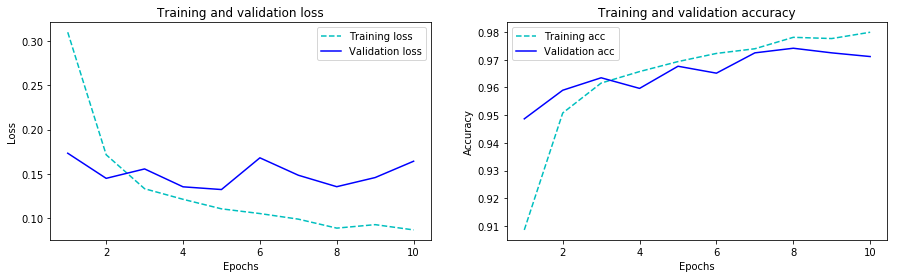

In [84]:
# applied early stop define in above step with patience = 5

history = dnn.fit(X_train,y_train,
                  batch_size=64,
                  epochs=50,
                  validation_data=(X_val,y_val),
                  callbacks=[early_stopping],
                  verbose=False)

# save a model
dnn.save('Experiment_model/dnn_model_3.h5')

show_result(history)

#### Tuning: experiment 4

In [85]:
# 4-layer neural network with dropout rate 0.4 to the last layer

dnn = models.Sequential()
# First layer with input shape of 28*28
dnn.add(layers.Dense(128,activation='elu',
                     input_shape=(X_train.shape[1],),
                     kernel_initializer='he_normal',
                     name='hidden_1'))
# Second layer
dnn.add(layers.Dense(512,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_2'))
dnn.add(layers.Dropout(0.1,name='dropout_1'))
# Third layer
dnn.add(layers.Dense(512,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_3'))
dnn.add(layers.Dropout(0.4,name='dropout_2'))
# Last layer
dnn.add(layers.Dense(10,activation='softmax',name='output'))
# compile
dnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['acc'])
dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 128)               100480    
_________________________________________________________________
hidden_2 (Dense)             (None, 512)               66048     
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_3 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
output (Dense)               (None, 10)                5130      
Total params: 434,314
Trainable params: 434,314
Non-trainable params: 0
_________________________________________________________________


Last train accuracy: 0.9808888888888889
Last validation accuracy: 0.973


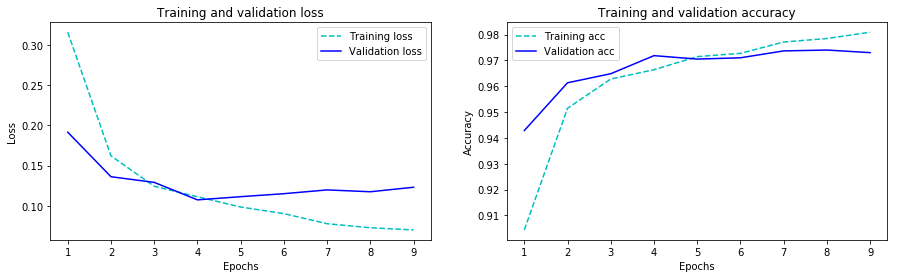

In [86]:
# applied early stop define in above step with patience = 5

history = dnn.fit(X_train,y_train,
                  batch_size=64,
                  epochs=50,
                  validation_data=(X_val,y_val),
                  callbacks=[early_stopping],
                  verbose=False)

# save a model
dnn.save('Experiment_model/dnn_model_4.h5')

show_result(history)

#### Tuning: experiment 5

In [87]:
# 4-layer neural network with dropout rate 0.4 to the last layer

dnn = models.Sequential()
# First layer with input shape of 28*28
dnn.add(layers.Dense(256,activation='elu',
                     input_shape=(X_train.shape[1],),
                     kernel_initializer='he_normal',
                     name='hidden_1'))
dnn.add(layers.Dropout(0.1,name='dropout_1'))
# Second layer
dnn.add(layers.Dense(512,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_2'))
dnn.add(layers.Dropout(0.1,name='dropout_2'))
# Third layer
dnn.add(layers.Dense(512,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_3'))
dnn.add(layers.Dropout(0.5,name='dropout_3'))
# Last layer
dnn.add(layers.Dense(10,activation='softmax',name='output'))

# compile
dnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['acc'])
dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_2 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_3 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
output (Dense)               (None, 10)                5130      
Total para

Last train accuracy: 0.9845
Last validation accuracy: 0.9758333333333333


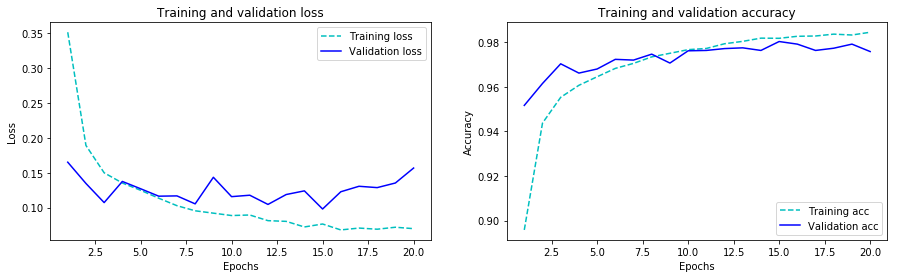

In [88]:
# applied early stop define in above step with patience = 5

history = dnn.fit(X_train,y_train,
                  batch_size=64,
                  epochs=50,
                  validation_data=(X_val,y_val),
                  callbacks=[early_stopping],
                  verbose=False)

# save a model
dnn.save('Experiment_model/dnn_model_5.h5')

show_result(history)

#### Tuning: experiment 6

In [89]:
# 4-layer neural network with dropout rate 0.4 to the last layer

dnn = models.Sequential()
# First layer with input shape of 28*28
dnn.add(layers.Dense(512,activation='elu',
                     input_shape=(X_train.shape[1],),
                     kernel_initializer='he_normal',
                     name='hidden_1'))
dnn.add(layers.Dropout(0.1,name='dropout_1'))
# Second layer
dnn.add(layers.Dense(512,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_2'))
dnn.add(layers.Dropout(0.1,name='dropout_2'))
# Third layer
dnn.add(layers.Dense(1024,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_3'))
dnn.add(layers.Dropout(0.5,name='dropout_3'))
# Fourth layer
dnn.add(layers.Dense(256,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_4'))
dnn.add(layers.Dropout(0.5,name='dropout_4'))
# Last layer
dnn.add(layers.Dense(10,activation='softmax',name='output'))

# compile
dnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['acc'])
dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_2 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_3 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
hidden_4 (Dense)             (None, 256)               262400    
__________

Last train accuracy: 0.9889814814991421
Last validation accuracy: 0.9798333334922791


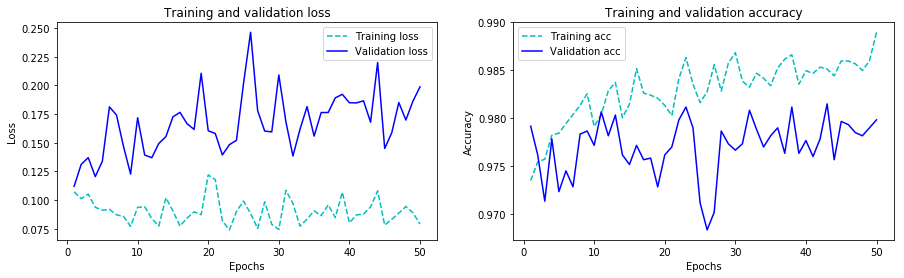

In [91]:
# Train without early stop

history = dnn.fit(X_train,y_train,
                  batch_size=64,
                  epochs=50,
                  validation_data=(X_val,y_val),
                  verbose=False)

# save a model
dnn.save('Experiment_model/dnn_model_6.h5')

show_result(history)

#### Tuning: experiment 7

In [129]:
# The last model get overfit at the start of the training. Thus, we have to make model less complex

dnn = models.Sequential()
# First layer with input shape of 28*28
dnn.add(layers.Dense(256,activation='elu',
                     input_shape=(X_train.shape[1],),
                     kernel_initializer='he_normal',
                     name='hidden_1'))
dnn.add(layers.Dropout(0.1,name='dropout_1'))
# Second layer
dnn.add(layers.Dense(512,activation='elu',
                     kernel_initializer='he_normal',
                     name='hidden_2'))
dnn.add(layers.Dropout(0.1,name='dropout_2'))
# Last layer
dnn.add(layers.Dense(10,activation='softmax',name='output'))

# compile
dnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['acc'])
dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_2 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
output (Dense)               (None, 10)                5130      
Total params: 337,674
Trainable params: 337,674
Non-trainable params: 0
_________________________________________________________________


Last train accuracy: 0.9964814814814815
Last validation accuracy: 0.9821666666666666


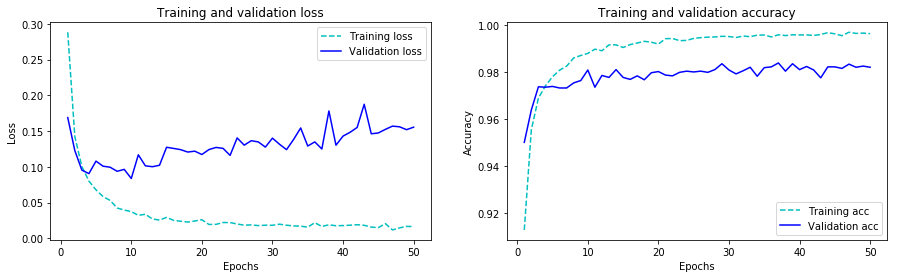

In [130]:
# Train without early stop

history = dnn.fit(X_train,y_train,
                  batch_size=64,
                  epochs=50,
                  validation_data=(X_val,y_val),
                  verbose=False)

# save a model
dnn.save('Experiment_model/dnn_model_7.h5')

show_result(history)

### 7. Final Evaluation

After you make sure that your model is good enough to be deploy in application, it is a time to evaluate your model with test set in order to test that your model is generalize well and not overfit to validation set.

In [131]:
evaluation_report(dnn,X_test,y_test)

[[ 974    1    0    0    0    2    0    1    1    1]
 [   1 1126    1    1    2    0    2    0    2    0]
 [   2    0 1013    2    1    0    1    4    8    1]
 [   2    0    6  989    0    5    0    2    2    4]
 [   1    0    2    0  966    0    5    1    2    5]
 [   2    0    0    6    1  870    2    1    6    4]
 [   1    1    0    1    4    7  941    0    3    0]
 [   0    2    8    0    3    0    0 1002    5    8]
 [   3    0    3    4    2    2    0    1  955    4]
 [   2    2    0    5   12    8    0    1    5  974]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.98      0.98      1010
          4       0.97      0.98      0.98       982
          5       0.97      0.98      0.97       892
          6       0.99      0.98      0.99       958
          7       0.99      0.97      0.98  

### Result & Discussion 

- Write down the key finding from this lab. Discuss what you had done, what do you get from the output or a result, and why (support your reason)

*Depend on the result from tuning step*

For this solution, we aim to reduce the overfit effect by try different architecuture with different dropout rate. Although, we are not achive highest accuracy. we will use other neural network architecture in the next lecture called convolutional neural network.

### 8. Play with your model

1. Use any kind of drawing application ( For example, Paint or Adobe Photoshop ), create a 28x28 pixel (any resolution) with black (#000000) background and white (#FFFFFF) paint. 
2. Draw 3 any distinct single digit number of a range from 0 - 9. Then save the image (PNG)
3. Install open-cv (See https://pypi.org/project/opencv-python) by 
> `pip install opencv-python` <br/> or conda (See https://anaconda.org/conda-forge/opencv)
4. Load your image to this IPython using ```imread()``` function
5. Preprocess as what you did during the development stage.
6. Feed your image to your best model.

What class do your model predict? Does it correct? If not, why do it still get negative result since your model get more than 90% accuracy?

The image have a size of (6, 28, 28)


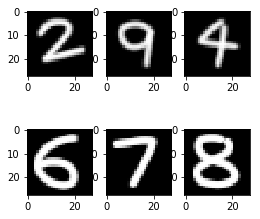

In [127]:
import cv2
test_img = []

for i in range(6):
    test_img.append(cv2.imread('test_data/test_data_%s.png'%str(i+1),cv2.IMREAD_GRAYSCALE))

# convert to numpy array
test_img = np.array(test_img)
print('The image have a size of %s'%str(test_img.shape))

# plot the test data
fig, ax = plt.subplots(2,3,figsize=(4,4))

ax[0,0].imshow(test_img[0],cmap='gray')
ax[0,1].imshow(test_img[1],cmap='gray')
ax[0,2].imshow(test_img[2],cmap='gray')
ax[1,0].imshow(test_img[3],cmap='gray')
ax[1,1].imshow(test_img[4],cmap='gray')
ax[1,2].imshow(test_img[5],cmap='gray')

# Preprocess
test_img = preprocess(test_img)

In [132]:
pred = dnn.predict(test_img)
res = pred.argmax(axis=-1)
print('The hand-written digit is %s'%str(res))

The hand-written digit is [2 9 9 5 7 3]


Even the accuracy is high, the result from this test still incorrect. 

For first 3 digit (2,9,4), the incorrect result come from the error of our model which 4 is similar to 9. To solve this problem, the have to train more data especially 4 and 9, 3 and 8. (observe this using confusion matrix) 

For the second row (6,7,8), the data is different with the data that we used to develop the model because the brush size is bigger than the size in develop data. Thus, this problem is about the development data that doesn't represent the data produce by the user. 

This can be solve by collect the data that is more representing what user feed to our application or constraint the input that going to be feed into an application. However, The later will make a bad user experience which may result in less user.

### Challenges: Play with initializer

- Create two-layer neural network with any hyperparameter
- Use or create an weight initializer function that initialize all the weight to one. See: https://keras.io/initializers/
- Discuss the result. what happen? and why?

In [101]:
dnn = models.Sequential()
dnn.add(layers.Dense(128,activation='elu',
                     input_shape=(X_train.shape[1],),
                     kernel_initializer=keras.initializers.Ones(),
                     name='hidden_1'))
dnn.add(layers.Dense(10,activation='softmax',name='output'))
# compile
dnn.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['acc'])

dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 128)               100480    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 82us/step - loss: 13.0113 - acc: 0.1893 - val_loss: 12.7435 - val_acc: 0.2085
Epoch 2/10
54000/54000 [==============================] - 2s 35us/step - loss: 12.7441 - acc: 0.2083 - val_loss: 12.7468 - val_acc: 0.2080
Epoch 3/10
54000/54000 [==============================] - 2s 35us/step - loss: 12.7440 - acc: 0.2081 - val_loss: 12.7434 - val_acc: 0.2087
Epoch 4/10
54000/54000 [==============================] - 2s 35us/step - loss: 12.7497 - acc: 0.2076 - val_loss: 12.7450 - val_acc: 0.2088
Epoch 5/10
54000/54000 [==============================] - 2s 35us/step - loss: 12.7472 - acc: 0.2082 - val_loss: 12.7512 - val_acc: 0.2073
Epoch 6/10
54000/54000 [==============================] - 2s 35us/step - loss: 12.7490 - acc: 0.2080 - val_loss: 12.7476 - val_acc: 0.2083
Epoch 7/10
54000/54000 [==============================] - 2s 35us/step - loss: 12.7448 - acc: 0.2089 - val_loss: 12.7

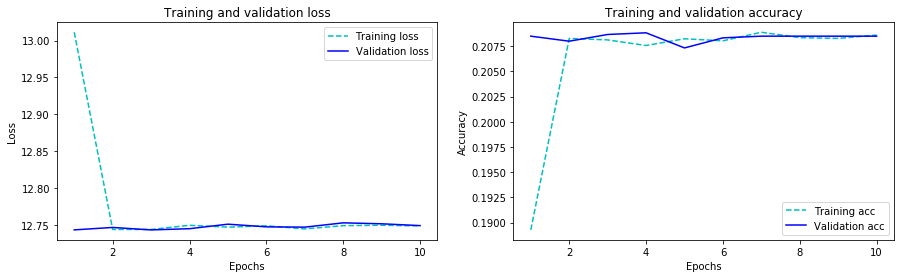

In [102]:
history = dnn.fit(X_train,y_train,
                  batch_size=128,
                  epochs=10,
                  validation_data=(X_val,y_val))
show_result(history)

In [ ]:
# save a model
dnn.save('Experiment_model/sym_dnn_model.h5')

When we intialize all weight to 1, the model become symmetry which mean every node compute the same matematical dot operation. Thus, all the layer will have a same weight value even after perform back propagation. This is why we have to randomly initialize the weight (or use some fancy initialize function. For instance, He initializer.)

Furthur explaination
1. https://stackoverflow.com/questions/20027598/why-should-weights-of-neural-networks-be-initialized-to-random-numbers
2. https://stats.stackexchange.com/questions/45087/why-doesnt-backpropagation-work-when-you-initialize-the-weights-the-same-value

